## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
# import data
df = pd.read_excel('/titanic.xlsx')
data = df.copy()

# Nomor 1


In [ ]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
data.sample(5)

,survived,name,sex,age
66,1,"Chaudanson, Miss. Victorine",female,36.0
11,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0
357,0,"Butler, Mr. Reginald Fenton",male,25.0
273,1,"Spedden, Master. Robert Douglas",male,6.0
187,1,"Lines, Miss. Mary Conover",female,16.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Menggunakan fungsi head, tail, dan sample, diketahui bahwa kolom selain kolom `name` dan `sex` adalah numerik. Kolom `sex` berisi dua nilai berbeda, yaitu male atau female. Kolom `survived` berisi biner (berisi antara 0 atau 1). Tidak ada cacat pada nama kolon.

Menggunakan fungsi info, diketahui bahwa data berisi 4 kolom dengan 500 baris. Hanya kolom `age` yang memiliki beberapa nilai yang hilang.


# Nomor 2


In [ ]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
categorical = ['sex']
numerical = ['survived', 'age']

In [ ]:
data[numerical].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Secara keseluruhan, kolom `survived` bersifat biner dengan distribusi yang cukup seimbang (~54% selamat). Kolom `age` memiliki nilai kontinu dengan distribusi yang agak simetris karena mean dan median hampir sama. Namun, terdapat 49 data yang hilang pada kolom `age` yang perlu ditangani dalam preprocessing. Nilai-nilai minimum dan maksimum pada `age` juga masih masuk akal, menunjukkan tidak ada outlier ekstrem.

In [ ]:
data[categorical].describe()

,sex
count,500
unique,2
top,male
freq,288


Kolom `sex` memiliki 2 nilai unik, 'male' dan 'female'. Penumpang sebagian besar adalah pria (288 baris), sisanya adalah wanita.

In [ ]:
for col in categorical:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of sex column
sex
male      288
female    212
Name: count, dtype: int64 



In [ ]:
for col in data.columns:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

#Nomor 3

### 1. Penanganan Duplikat

In [ ]:
len(data.drop_duplicates()) / len(data)

0.998

In [ ]:
duplicates = data[data.duplicated(keep=False)]
duplicate_counts =duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah_duplikat')
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [ ]:
data = data.drop_duplicates()

In [ ]:
len(data.drop_duplicates()) / len(data)

1.0

Duplikasi telah ditangani

### 2. Penanganan Nilai yang Hilang

In [ ]:
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

# Nomor 4

In [ ]:
total_rows = len(data)

for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)")

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


Persentase nilai yang hilang (9.82%) di bawah 20% sehingga kita tangani secara numerik dengan median.

In [ ]:
data['age'] = data['age'].fillna(data['age'].median())

In [ ]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


Berhasil menghapus nilai NULL!

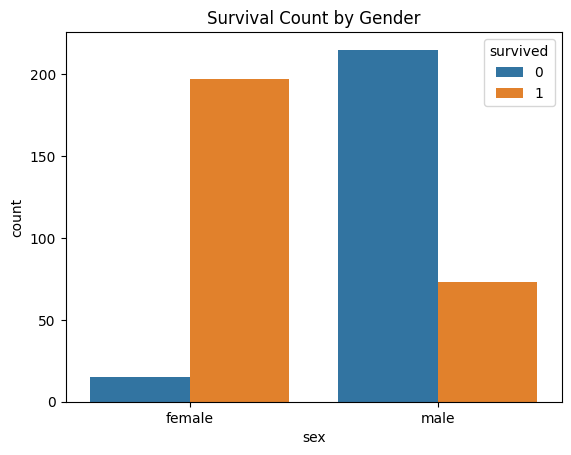

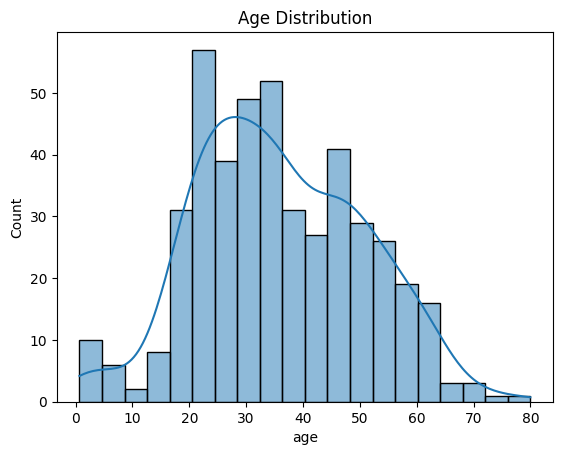

In [6]:
sns.countplot(x='sex', hue='survived', data=data)
plt.title("Survival Count by Gender")
plt.show()

print()

sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()